In [1]:
 import tensorflow as tf
 print(tf.__version__)

2.2.0-rc2


In [0]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [45]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = train_images/255.0

In [0]:
test_images = test_images/255.0

In [48]:
train_images.shape

(60000, 28, 28)

In [49]:
test_images.shape

(10000, 28, 28)

In [50]:
train_labels.shape

(60000,)

In [51]:
test_labels.shape

(10000,)

In [0]:
class_names = ['zero','one','two','three','four','five','six',
'seven','eight','nine']

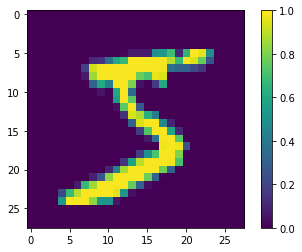

In [56]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


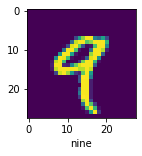

In [57]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[4])
plt.xlabel(target_labels[train_labels[4]])
plt.show()

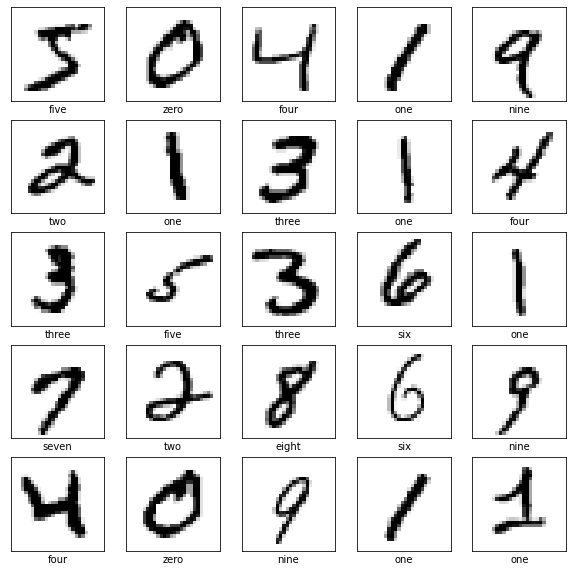

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
  


In [59]:
#layers
l0 = layers.Conv2D(128,(3,3) , activation='relu' , input_shape=(32,28,28))
l1 = layers.MaxPool2D(2,2)
l2 = layers.Conv2D(128,(3,3), activation='relu')
l3 = layers.MaxPool2D(2,2)
l4 = layers.Conv2D(128,(3,3) , activation='relu')

NameError: ignored

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 26, 128)       32384     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 3, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
#compile model
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

In [62]:
history = model.fit(train_images,train_labels, epochs=10,
                    validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2950 - accuracy: 0.3359 - val_loss: 2.2141 - val_accuracy: 0.2906
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2330 - accuracy: 0.2786 - val_loss: 2.2251 - val_accuracy: 0.2904
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2434 - accuracy: 0.2644 - val_loss: 2.3026 - val_accuracy: 0.2104
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.2098 - val_loss: 2.3026 - val_accuracy: 0.2104
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.2098 - val_loss: 2.3026 - val_accuracy: 0.2104
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.2098 - val_loss: 2.3026 - val_accuracy: 0.2104
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.2098 - val_loss: 2.3026 - val_accuracy:

In [34]:
plt.plot(history.history['accuracy'], label='accutacy')
plt.plot(history.history['val_accuracy'], label='val_accutacy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper left')
plt.show()

NameError: ignored

In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 2.3026 - accuracy: 0.2104

Test accuracy: 0.21040000021457672


In [0]:

import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 


In [0]:

(x_train, y_train), (x_test, y_test) = mnist.load_data() 


In [0]:

img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
  
else: 
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1) 
  
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255


In [0]:

y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 


In [0]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

In [52]:

model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 
  
model.fit(x_train, y_train, epochs=12, batch_size=500) 


Epoch 1/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.7295 - accuracy: 0.7709
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.2371 - accuracy: 0.9329
Epoch 3/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.1395 - accuracy: 0.9602
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.1003 - accuracy: 0.9717
Epoch 5/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0807 - accuracy: 0.9762
Epoch 6/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0673 - accuracy: 0.9799
Epoch 7/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0575 - accuracy: 0.9833
Epoch 8/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0522 - accuracy: 0.9842
Epoch 9/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0467 - accuracy: 0.9862
Epoch 10/12
60000/60000 [==============================

In [42]:

score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 


loss= 0.029979887168249116
accuracy= 0.9901999831199646


In [53]:

import cv2
import os
from numpy import reshape
from numpy import shape
from random import sample
import multiprocessing as mp

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam


class LoadData:
    """
    LoadData class stores and initializes dataset.
     Functions:
     __init__(self, parent_directory, true_class_name, epochs): Loads the true/target class and records the root
     directory for the dataset. Also, loads the invariant true class data into memory. The false class data are randomly
    initialized at each epoch to maintain a better generalization. Also, a single true/target class has less data than
    false classes. The randomization is used to remove decision bias for the network.
     load_images_from_folder(self, path, no_of_files, split_ratio): loads all images from a particular "path" with a
     fixed "no_of_files" and splits it into training-validation data w.r.t the "split_ratio". Returns two groups of files.
     class_loader(self, mode): Required parameter "mode". "true_class" loads target class and "false_class" loads other
     classes. Returns the specific train_files, train_labels, test_files, test_labels.
     dataset_generator(self): Combines true and false class data into one train and one test dataset. Returns the
     complete train_files, train_labels, test_files, test_labels.
    """

    def __init__(self, parent_directory, true_class_name, epochs):
        self.t_class = true_class_name
        self.p_dir = parent_directory
        self.epoch = epochs
        self.max_train_count = len(os.listdir(parent_directory+'/'+true_class_name))
        path = parent_directory + '/' + true_class_name
        self.training_images, self.testing_images = self.load_images_from_folder(path, self.max_train_count, 0.7)
        print(" Positive samples initialized")

    def load_images_from_folder(self, path, no_of_files, split_ratio):
        count = 0
        image_group_1 = []
        image_group_2 = []
        split_limit = int(no_of_files * split_ratio)
        file_names = sample(os.listdir(path), no_of_files)
        for names in file_names:
            img = cv2.imread(os.path.join(path, names), cv2.IMREAD_GRAYSCALE) / 255.0
            if img is not None and count < split_limit:
                image_group_1.append(img)
                count = count + 1
            elif img is not None and count >= split_limit:
                image_group_2.append(img)
        return image_group_1, image_group_2

    def class_loader(self, mode):
        if mode == 'true_class':
            return self.training_images, [1] * len(self.training_images), self.testing_images, [1] * len(self.testing_images)
        elif mode == 'false_class':
            training_images = []
            testing_images = []
            all_folders = os.listdir(self.p_dir)
            all_folders.remove(self.t_class)
            no_of_neg_train_samples_per_class = int(self.max_train_count / len(all_folders))
            for folder_names in all_folders:
                path = self.p_dir + '/' + folder_names
                trn_images, tst_images = self.load_images_from_folder(path, no_of_neg_train_samples_per_class, 0.7)
                training_images += trn_images
                testing_images += tst_images
            return training_images, [0] * len(training_images), testing_images, [0] * len(testing_images)

    def dataset_generator(self):
        print(" Preparing Dataset")
        pos_train_img, pos_train_lab, pos_test_img, pos_test_lab = self.class_loader('true_class')
        print(" Positive samples accessed")
        neg_train_img, neg_train_lab, neg_test_img, neg_test_lab = self.class_loader('false_class')
        print(" Negative samples loaded")
        training_data = pos_train_img + neg_train_img
        training_labels = pos_train_lab + neg_train_lab
        testing_data = pos_test_img + neg_test_img
        testing_labels = pos_test_lab + neg_test_lab
        training_data = reshape(training_data, (shape(training_data)[0], shape(training_data)[1], shape(training_data)[2], 1))
        testing_data = reshape(testing_data, (shape(testing_data)[0], shape(testing_data)[1], shape(testing_data)[2], 1))
        print(" Data Reshaped")
        print(" Training Data shape: ", shape(training_data))
        print(" Testing Data shape: ", shape(testing_data))
        return training_data, training_labels, testing_data, testing_labels

# CNN Model construction
model = Sequential()
model.add(Conv2D(32, (7, 7), input_shape=(128, 128, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = Adam()
model.compile(loss='mse', optimizer=adam)
print(" CNN model compiled")

init = LoadData(parent_directory='C:\Training', true_class_name='A', epochs=2)
print(" LoadData object initialized")

exec_pool = mp.Pool()

# for i in range(1, init.epoch):
train_data, train_labels, test_data, test_labels = init.dataset_generator()
print(" Training !")

exec_pool.map(model.fit(train_data, train_labels, validation_split=0.2, shuffle=True, epochs=1),)

exec_pool.join()
exec_pool.close()

 CNN model compiled


FileNotFoundError: ignored

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.2.0-rc2


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels ) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

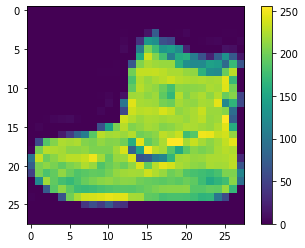

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


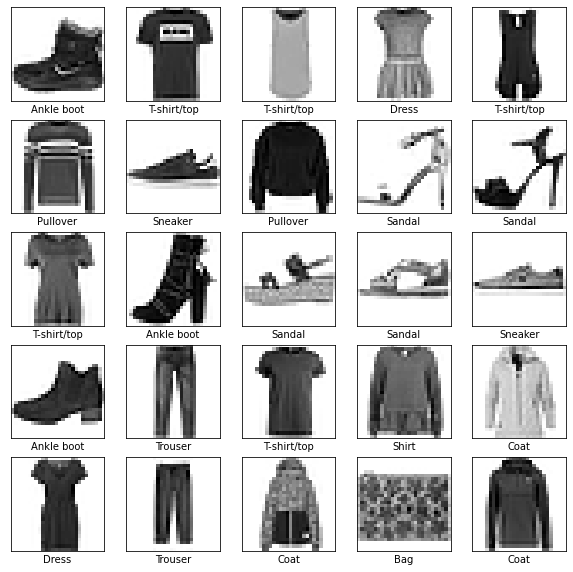

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [28]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5000 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3765 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3479 - accuracy: 0.8782

Test accuracy: 0.8781999945640564


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [0]:
predictions = probability_model.predict(test_images)


In [32]:
predictions[0]


array([1.11942976e-10, 3.50116770e-15, 2.98216074e-12, 7.08589090e-12,
       2.28795455e-12, 1.28705151e-05, 3.64778451e-11, 3.25951236e-03,
       1.04123488e-09, 9.96727586e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])


9

In [34]:
test_labels[0]


9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


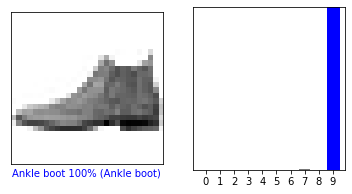

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


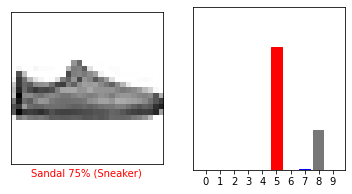

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


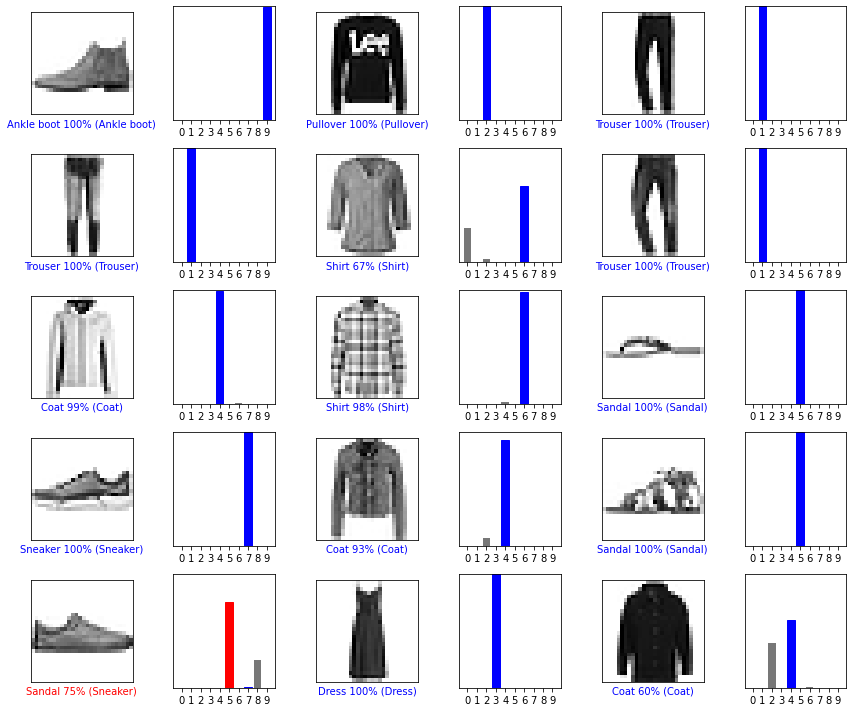

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [39]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[8.9226298e-05 1.2180809e-13 9.9982113e-01 2.3133219e-11 7.7996490e-05
  1.2829672e-13 1.1681797e-05 8.7044200e-21 7.5950979e-10 3.6413063e-17]]


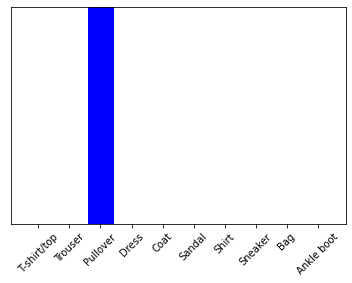

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [43]:
np.argmax(predictions_single[0])


2